<a href="https://colab.research.google.com/github/Tinomuchenje/am-i-in-the-picture/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

In [ ]:
%cd /content/gdrive/My Drive/mypictures

/content/gdrive/My Drive/mypictures


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.6.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: tensorboard, absl-py, keras, flatbuffers, wheel, keras-preprocessing, gast, opt-einsum, google-pasta, clang, termcolor, typing-extensions, protobuf, numpy, grpcio, six, wrapt, tensorflow-estimator, astunparse, h5py
Required-by: kapre


In [ ]:

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

# specifically for convolution neural network
from tensorflow.keras.layers import Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
def make_train_data(picture_type,DIR):
    i = 0
    for img in os.listdir(DIR):
    
        if ".py" not in img:  # don't use file that is not image
            i = i + 1
            
            label = picture_type
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)

            try:
              img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            
              X.append(np.array(img))
              Z.append(str(label))
            except:
              break
            
            
        
        if i == 50:
            break

In [ ]:
X=[]
Z=[]
IMG_SIZE=300
#Specifying directories for training sets
IN_PICTURE_DIR='./In Picture'
NOT_IN_PICTURE_DIR='./Not In Picture'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
#Train for when i am in the picture
make_train_data('In Picture', IN_PICTURE_DIR)
print(len(X))

104


In [ ]:
make_train_data('Not In Picture', NOT_IN_PICTURE_DIR)
print(len(X))

134


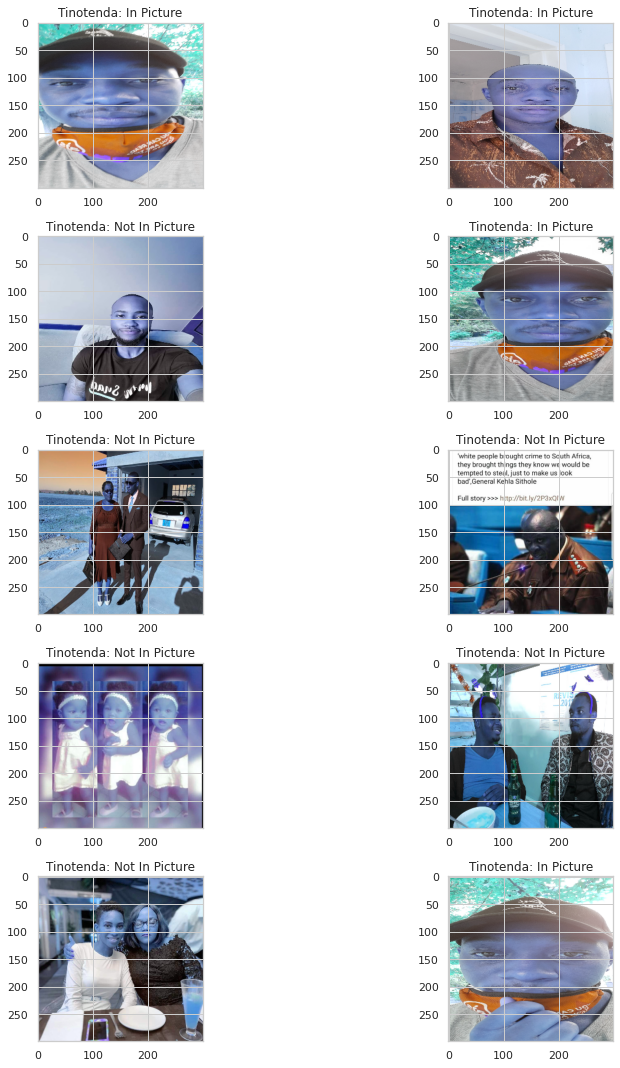

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Tinotenda: '+Z[l])
        
plt.tight_layout()

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)


In [ ]:
print(X[0])
print(Y[0])


[[[ 81 159 155]
  [ 87 157 164]
  [ 36 118 121]
  ...
  [130 142 140]
  [187 195 194]
  [187 198 196]]

 [[  5  90  85]
  [ 61 155 151]
  [ 90 182 183]
  ...
  [183 198 194]
  [141 151 149]
  [ 81  87  86]]

 [[ 56 176 159]
  [ 68 175 165]
  [ 16 107 110]
  ...
  [170 191 186]
  [185 199 195]
  [186 200 196]]

 ...

 [[169 174 175]
  [158 163 167]
  [154 159 160]
  ...
  [134 141 144]
  [137 142 145]
  [134 139 142]]

 [[173 178 179]
  [165 170 173]
  [162 167 168]
  ...
  [147 152 155]
  [157 164 167]
  [138 145 148]]

 [[124 128 129]
  [161 169 169]
  [152 156 157]
  ...
  [138 145 148]
  [144 151 154]
  [147 154 157]]]
0


In [ ]:
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
x_train[0]

array([[[0.88627451, 1.        , 1.        ],
        [0.60784314, 0.74901961, 0.74901961],
        [0.8745098 , 0.89803922, 0.90196078],
        ...,
        [0.61568627, 0.81176471, 0.76470588],
        [0.63137255, 0.81960784, 0.77254902],
        [0.63921569, 0.82745098, 0.78039216]],

       [[0.68627451, 0.88235294, 0.83529412],
        [0.59215686, 0.77647059, 0.72941176],
        [0.3254902 , 0.54901961, 0.49019608],
        ...,
        [0.62352941, 0.82745098, 0.78823529],
        [0.64705882, 0.83137255, 0.8       ],
        [0.72156863, 0.88627451, 0.85882353]],

       [[0.41960784, 0.63137255, 0.57254902],
        [0.37254902, 0.58823529, 0.52941176],
        [0.36470588, 0.65098039, 0.57254902],
        ...,
        [0.64705882, 0.83529412, 0.81176471],
        [0.74509804, 0.91764706, 0.89411765],
        [0.83137255, 0.98823529, 0.97647059]],

       ...,

       [[0.61176471, 0.63137255, 0.62352941],
        [0.58039216, 0.60784314, 0.59607843],
        [0.56470588, 0

In [ ]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))

model.add(Activation('relu'))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
batch_size=32
epochs=20

In [ ]:
x_train.shape


(107, 300, 300, 3)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 96)      55392     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 96)        83040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       1

In [ ]:
print(epochs)

20


In [ ]:
History = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/20
4/4 [==============================] - 41s 9s/step - loss: 1.3471 - accuracy: 0.6075 - val_loss: 0.7409 - val_accuracy: 0.4074
Epoch 2/20
4/4 [==============================] - 39s 9s/step - loss: 0.7191 - accuracy: 0.5607 - val_loss: 0.6716 - val_accuracy: 0.5926
Epoch 3/20
4/4 [==============================] - 39s 9s/step - loss: 0.6410 - accuracy: 0.6916 - val_loss: 0.6799 - val_accuracy: 0.5926
Epoch 4/20
4/4 [==============================] - 38s 9s/step - loss: 0.6501 - accuracy: 0.6916 - val_loss: 0.6779 - val_accuracy: 0.5926
Epoch 5/20
4/4 [==============================] - 38s 9s/step - loss: 0.6066 - accuracy: 0.6916 - val_loss: 0.6577 - val_accuracy: 0.5926
Epoch 6/20
4/4 [==============================] - 39s 9s/step - loss: 0.6069 - accuracy: 0.6916 - val_loss: 0.6608 - val_accuracy: 0.5926
Epoch 7/20
4/4 [==============================] - 39s 9s/step - loss: 0.5794 - accuracy: 0.6916 - val_loss: 0.7001 - val_accuracy: 0.5926
Epoch 8/20
4/4 [==================

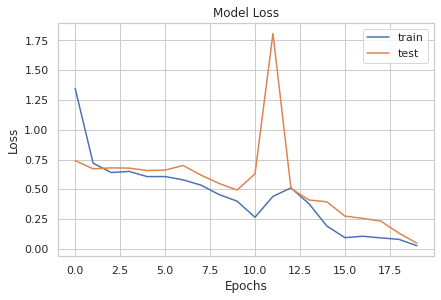

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


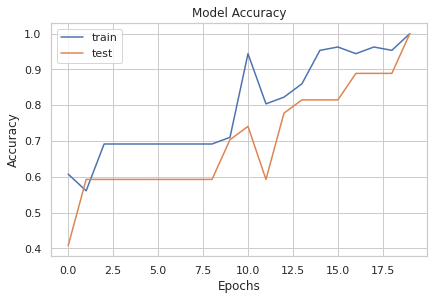

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

pred

array([[9.99622166e-01],
       [9.86266673e-01],
       [9.98931468e-01],
       [3.42820466e-01],
       [9.84698653e-01],
       [9.76768613e-01],
       [5.60572743e-03],
       [9.43476439e-01],
       [3.62728834e-02],
       [3.42820466e-01],
       [9.94750619e-01],
       [9.98209536e-01],
       [9.43476439e-01],
       [9.99470592e-01],
       [9.82827544e-01],
       [9.99998748e-01],
       [2.63932347e-03],
       [5.52314259e-06],
       [9.73641276e-01],
       [2.30461046e-05],
       [9.43702459e-03],
       [9.75120664e-01],
       [1.37341349e-05],
       [3.62728834e-02],
       [1.02060646e-01],
       [9.98248219e-01],
       [9.99622166e-01]], dtype=float32)

In [ ]:
pred[5]

array([0.9767686], dtype=float32)

In [ ]:
pred_digits[1]

0

In [ ]:
def predict_with_class(image_number):
  if pred_digits[image_number] == 0:
    print("Not In Picture")
  elif pred_digits[image_number] == 1:
    print("In Picture")
  else:
    print("In Picture")

In [ ]:
predict_with_class(10)

Not In Picture


In [ ]:

for i in pred_digits:
  predict_with_class(i)

Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
Not In Picture
